In [213]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import rcParams
import numpy.ma as ma
from numpy import nan
import matplotlib.font_manager

In [214]:
dv = pd.read_csv('Element_profiles_RioBlanco.csv')
df = dv.replace(['<0.02','<0.01','<0.05','<0.002','<0.5', '<1'],'0') #plot below detection limits as zero
df = df.replace('#VALUE!', np.NaN)

#### Dataset description:

    -14 total sites
    -Sites 1-6 are AKP
    -Sites 7-13 are BKP
    -Site 14 is LG1

### Li concentrations vs. depth

In [215]:
n = df.iloc[1:64,:] #excluding the guaba ridge profile
y = n['depth']
x = n['Li']

x = x.tolist()
y = y.tolist()

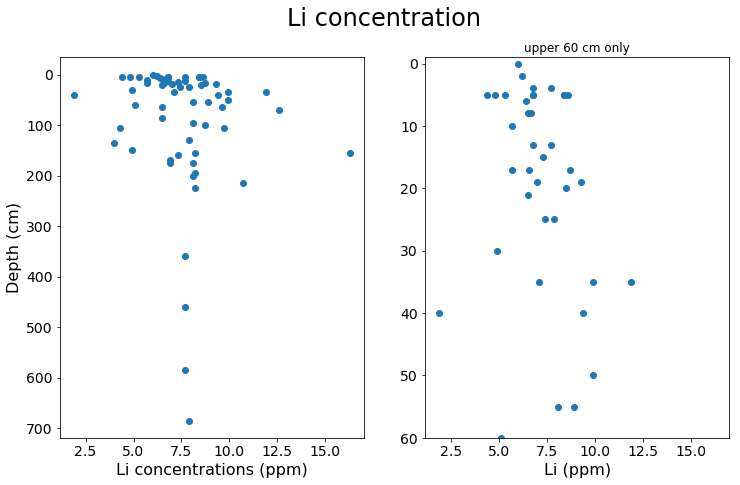

In [216]:
rcParams['font.family']='sans-serif'
rcParams['font.sans-serif']='Helvetica Light'
rcParams['axes.labelsize'] = 16 
rcParams['xtick.labelsize'] = 14 
rcParams['ytick.labelsize'] = 14 

fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

ax.plot(x, y, marker='o', linestyle='')
ax.set_ylabel('Depth (cm)')
ax.set_xlabel('Li concentrations (ppm)')
ax.invert_yaxis()

ax1.plot(x, y, marker='o', linestyle='')
#ax1.set_ylabel('Depth (m)')
ax1.set_xlabel('Li (ppm)')
ax1.set_ylim(-1,60)
ax1.invert_yaxis()
ax1.set_title('upper 60 cm only')

plt.suptitle('Li concentration', fontsize=24)
plt.show()

### Normalized La/Y ratios

In [199]:
la = n['La'].astype(float)
rock_la = 4 #bedrock concentration in ug/g
la_n = [x / rock_la for x in la]

rey = n['Y'].astype(float)
rock_rey = 22 #bedrock concentration in ug/g
rey_n = [i / rock_rey for i in rey]

In [200]:
ratio = [g/f for g, f in zip(la_n, rey_n)]

#dropping the below detection limit values
La_rey = pd.DataFrame({'ratio':ratio, 'depth':y})
La_rey = La_rey[(La_rey.T != 0).all()]
La_rey = La_rey.astype(float) #because the depths were an object list

In [201]:
LG1 = pd.read_csv('LG1_ratio_n.csv').dropna()
LG1_ratio = LG1['La/Y']
LG1_depth = LG1['Depth'].astype(float)
lg_depth = [h*100 for h in LG1_depth]

In [202]:
ratio_label = r'$\frac{La_N}{Y_N}$'

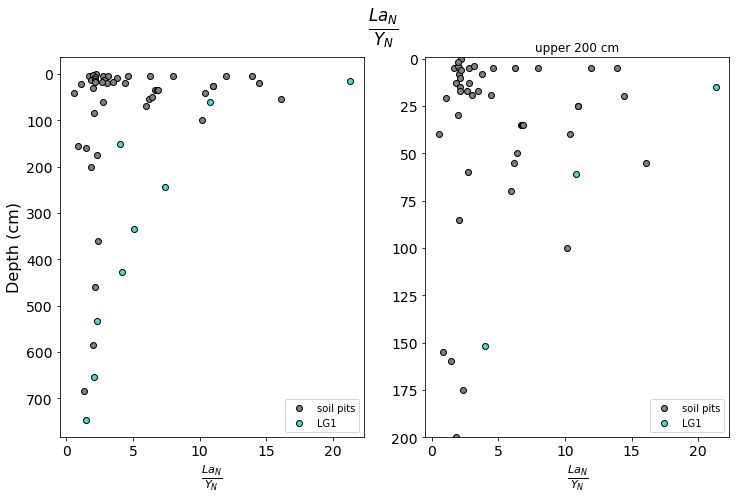

In [206]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

ax.plot(La_rey['ratio'], La_rey['depth'], marker='o', linestyle='', label='soil pits', color='grey', markeredgecolor=('k'))
ax.plot(LG1_ratio, lg_depth, marker='o', linestyle='', label='LG1', markeredgecolor=('k'), color='turquoise')
ax.set_ylabel('Depth (cm)')
ax.set_xlabel(ratio_label)
ax.invert_yaxis()
ax.legend(loc='lower right')

ax1.plot(La_rey['ratio'], La_rey['depth'], marker='o', linestyle='', label='soil pits', color='grey', markeredgecolor=('k'))
ax1.plot(LG1_ratio, lg_depth, marker='o', linestyle='', label='LG1', markeredgecolor=('k'), color='turquoise')
ax1.set_xlabel(ratio_label)
ax1.set_ylim(-1,200)
ax1.invert_yaxis()
ax1.set_title('upper 200 cm')
ax1.legend(loc='lower right')

plt.suptitle(ratio_label, fontsize=24)
plt.show()

### CDF and CIA 

In [191]:
SabLL = df.iloc[1:6,1:76]
R191 = df.iloc[6:9,1:76]
T1OX = df.iloc[9:14,1:76]
IC_A11 = df.iloc[14:19,1:76]
IC_A13 = df.iloc[19:24,1:76]
IC_A12 = df.iloc[24:32,1:76]
IC_B13 = df.iloc[32:36,1:76]
RB_B11 = df.iloc[36:38,1:76]
IC_B5 = df.iloc[38:40, 1:76]
RB_B12 = df.iloc[40:42, 1:76]
US01 = df.iloc[42:47, 1:76]
US02 = df.iloc[47:53, 1:76]
US03 = df.iloc[53:64, 1:76]
LG1 = df.iloc[64:94, 1:76]

In [192]:
AKP = pd.concat([SabLL, R191, T1OX, IC_A11, IC_A12, IC_A13])
BKP = pd.concat([RB_B11, IC_B5, RB_B12, US01, US02, US03])
cia_a = AKP['CIA'].astype(float)
cia_b = BKP['CIA'].astype(float)
depth_a = AKP['depth'].astype(float)
depth_b = BKP['depth'].astype(float)
cia_lg = LG1['CIA'].astype(float)
depth_lg = LG1['depth'].astype(float)
lg_depth = [m*100 for m in depth_lg]

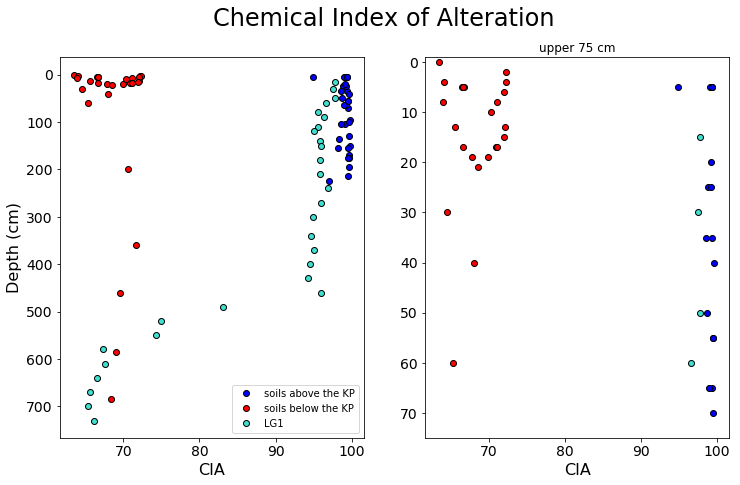

In [197]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

ax.plot(cia_a, depth_a, 'bo', linestyle='', label='soils above the KP', markeredgecolor=('k'))
ax.plot(cia_b, depth_b, 'ro', linestyle='', label='soils below the KP', markeredgecolor=('k'))
ax.plot(cia_lg, lg_depth, marker='o', linestyle='', label='LG1', markeredgecolor=('k'), color='turquoise')
ax.set_ylabel('Depth (cm)')
ax.set_xlabel('CIA')
ax.invert_yaxis()
ax.legend(loc='lower right')

ax1.plot(cia_a, depth_a, 'bo', linestyle='', label='soils above the KP', markeredgecolor=('k'))
ax1.plot(cia_b, depth_b, 'ro', linestyle='', label='soils below the KP', markeredgecolor=('k'))
ax1.plot(cia_lg, lg_depth, marker='o', linestyle='', label='LG1', markeredgecolor=('k'), color='turquoise')
ax1.set_xlabel('CIA')
ax1.set_ylim(-1,75)
ax1.invert_yaxis()
ax1.set_title('upper 75 cm')
#ax1.legend(loc='lower right')


plt.suptitle('Chemical Index of Alteration', fontsize=24)
plt.show()

### La/Y ratios above vs. below the knick point

In [217]:
la_akp = AKP['La'].astype(float)
rock_la = 4 #bedrock concentration in ug/g
la_akp = [x / rock_la for x in la_akp]

rey_akp = AKP['Y'].astype(float)
rock_rey = 22 #bedrock concentration in ug/g
rey_akp = [i / rock_rey for i in rey_akp]

In [218]:
la_bkp = BKP['La'].astype(float)
rock_la = 4 #bedrock concentration in ug/g
la_bkp = [x / rock_la for x in la_bkp]

rey_bkp = BKP['Y'].astype(float)
rock_rey = 22 #bedrock concentration in ug/g
rey_bkp = [i / rock_rey for i in rey_bkp]

In [252]:
ratio_akp = [g/f for g, f in zip(la_akp, rey_akp)]
ratio_bkp = [g/f for g, f in zip(la_bkp, rey_bkp)]

In [253]:
ratio_akp = pd.Series(ratio_akp)
AKP['la_rey'] = ratio_akp #add ratios to df
AKP = AKP[(AKP.T != 0).all()] #drop values below detection limit

ratio_bkp = pd.Series(ratio_bkp)
BKP['la_rey'] = ratio_bkp
BKP = BKP[(BKP.T !=0).all()]

#assign variables for the graph
akp_x = AKP['la_rey']
akp_y = AKP['depth']

bkp_x = BKP['la_rey']
bkp_y = BKP['depth']

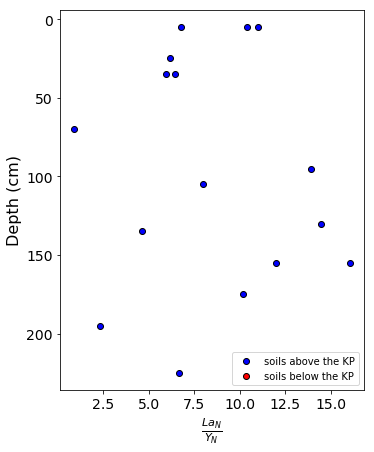

In [247]:
fig = plt.figure(figsize=(12,7))
ax = fig.add_subplot(121)
#ax1 = fig.add_subplot(122)

ax.plot(akp_x, akp_y, 'bo', linestyle='', label='soils above the KP', markeredgecolor=('k'))
ax.plot(bkp_x, bkp_y, 'ro', linestyle='', label='soils below the KP', markeredgecolor=('k'))
ax.set_ylabel('Depth (cm)')
ax.set_xlabel(ratio_label)
ax.invert_yaxis()
ax.legend(loc='lower right')
            
plt.show()

In [254]:
BKP

,SAMPLE,depth,Recvd Wt.,Ag,Al,As,Ba,Be,Bi,Ca,...,SrO,BaO,LOI,Total,CDF - Zr- whole rock,CDF -Zr - sap,La_n,Y_n,CIA,la_rey
36,RB-B11-5,5,0.05,0.03,8.27,0.5,170,0.34,0.03,3.88,...,0.02,0.02,7.4,100.62,0.12,0.01,1.45,0.713636,66.53,NaN
37,RB-B11-30,30,0.05,0.02,8.52,0.8,180,0.36,0.02,4.36,...,0.02,0.02,2.77,99.91,0.10,0.00,1.35,0.686364,64.57,NaN
38,IC-B5-5,5,0.07,0.02,8.1,0.9,380,0.55,0.15,3.6,...,0.03,0.04,9.71,100.73,0.30,0.08,2.25,0.813636,66.71,NaN
39,IC-B5-60,60,0.05,0.02,8.35,1.4,440,0.66,0.2,4.03,...,0.04,0.05,4.13,101.04,0.24,0.00,2.125,0.777273,65.36,NaN
40,RB-B12-5,5,0.06,0.04,8.16,0.4,150,0.35,0.05,3.93,...,0.02,0.02,7.5,101.55,-0.13,1.00,1.175,0.704545,66.60,NaN
41,RB-B12-40,40,0.05,8.77,0.7,150,0.44,0.03,4.48,0.05,...,0.02,3.53,100.41,100.41,-5999.00,0.00,1.175,2.181818,68.01,NaN
42,US01A 4-6,4,0.02,0.04,8.24,1.1,290,0.65,0.86,2.44,...,0.01,0.03,14.6,99.09,0.33,-0.02,2.375,0.754545,72.24,NaN
43,US01A 8-10,8,0.02,0.02,7.7,1.3,260,0.6,0.17,2.33,...,0.01,0.03,10.1,100.42,0.30,-0.06,2.425,0.640909,71.07,NaN
44,US01B 13-15,13,0,0.03,8.08,1,260,0.69,0.56,2.37,...,0.01,0.03,8.33,98.75,0.42,0.13,1.85,0.663636,72.09,NaN
45,US01B 17-19,17,0.02,0.02,7.92,0.9,250,0.62,0.12,2.44,...,0.02,0.03,5.13,100.03,0.34,0.00,1.975,0.563636,70.92,NaN
